In [59]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.stattools as stattools
import math

import pmdarima as pm

In [128]:
df = pd.read_csv("../prices.txt", sep='\s+', header=None, index_col=None)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,13.845620,69.033740,47.262580,48.004780,55.496120,11.740700,18.177200,46.78280,68.537300,50.185100,...,31.651400,63.251640,12.502360,60.843540,36.523580,52.461460,57.537160,34.427360,41.273040,56.123620
std,0.748745,3.908187,0.614438,2.051494,1.733916,0.635884,0.299771,1.26656,0.585843,3.207362,...,0.771223,7.833634,0.940225,1.898022,1.561982,0.756214,4.548284,0.878169,3.814908,1.178059
min,12.630000,62.470000,46.330000,44.900000,51.660000,10.020000,17.650000,44.01000,67.260000,45.260000,...,30.270000,50.620000,10.630000,56.260000,31.760000,50.210000,49.200000,32.800000,31.640000,53.470000
25%,13.207500,65.517500,46.820000,45.750000,54.000000,11.480000,17.970000,45.91750,68.110000,47.597500,...,30.950000,55.865000,11.817500,59.420000,35.837500,52.050000,54.062500,33.800000,39.615000,55.317500
50%,13.590000,68.255000,46.975000,47.830000,55.880000,11.850000,18.100000,46.69000,68.550000,49.535000,...,31.590000,64.615000,12.210000,60.750000,36.825000,52.375000,55.425000,34.350000,41.665000,56.100000
75%,14.582500,72.915000,47.800000,50.380000,56.720000,12.210000,18.410000,47.50250,68.912500,52.192500,...,32.302500,70.352500,13.232500,62.107500,37.602500,52.892500,61.855000,35.032500,43.525000,57.002500
max,15.560000,75.150000,48.610000,51.010000,59.120000,13.000000,18.980000,51.09000,69.990000,59.100000,...,33.260000,77.470000,14.500000,66.090000,39.130000,54.150000,66.600000,36.480000,50.020000,59.310000


In [130]:
df[18].describe()

count    500.000000
mean      13.722540
std        0.697558
min       12.090000
25%       13.260000
50%       13.960000
75%       14.270000
max       14.750000
Name: 18, dtype: float64

C:\Users\DELL\AppData\Local\Temp\ipykernel_8100\4209745089.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


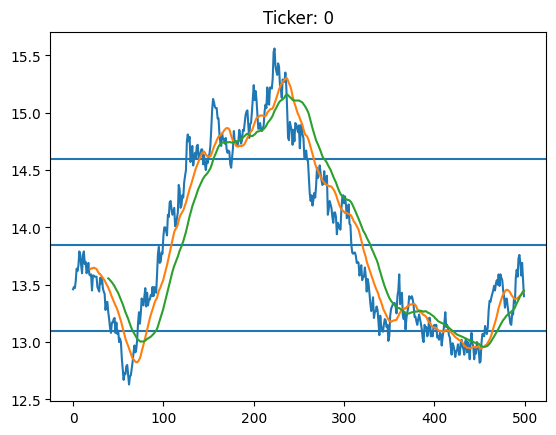

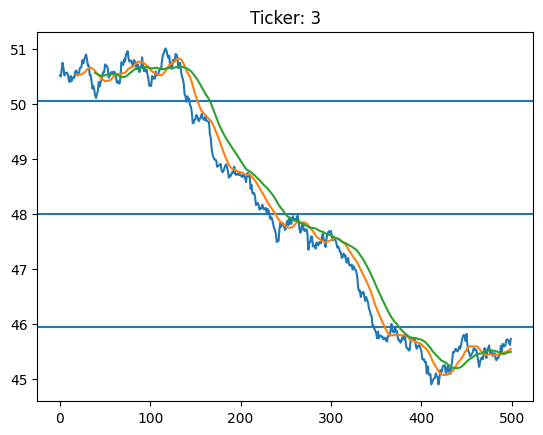

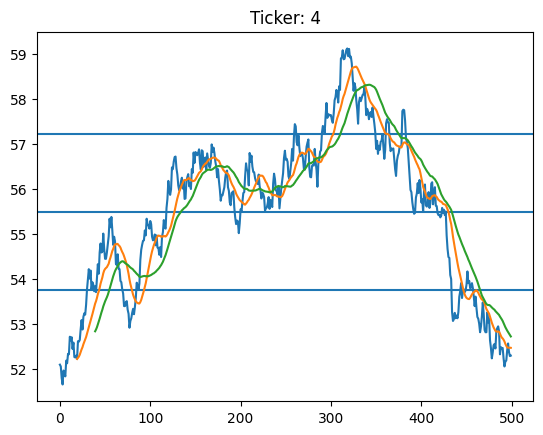

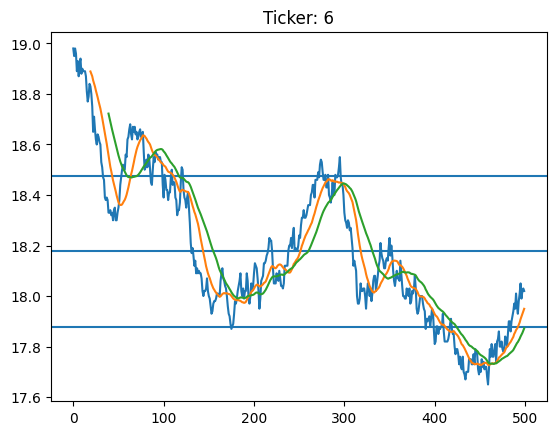

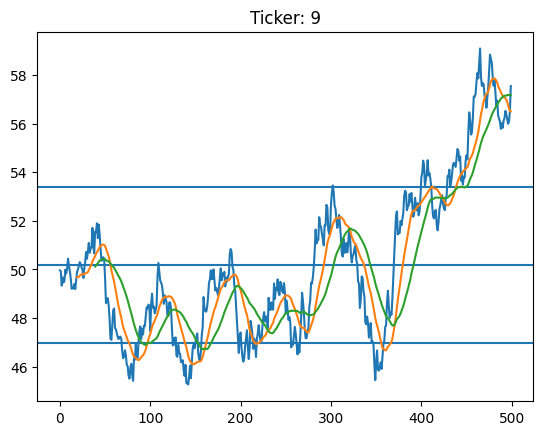

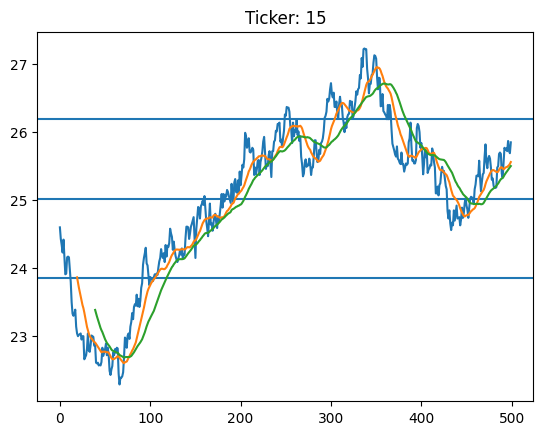

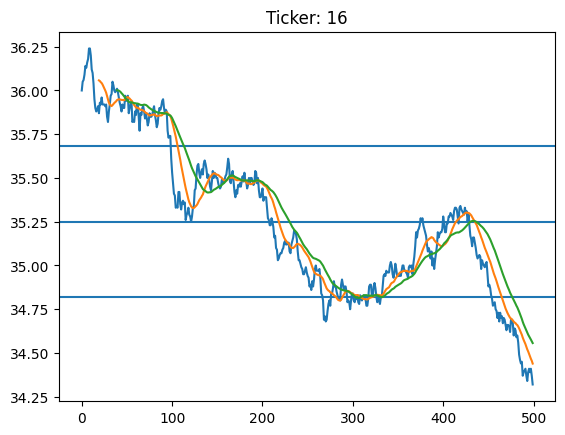

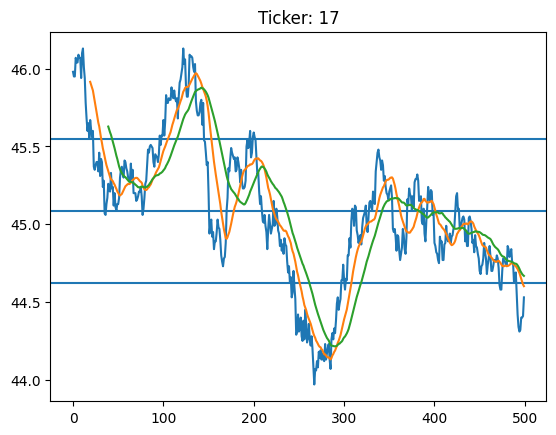

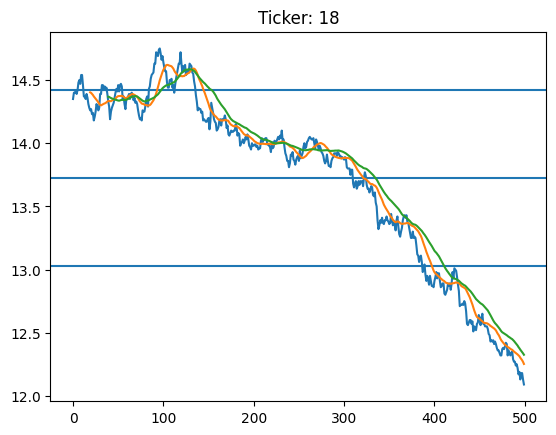

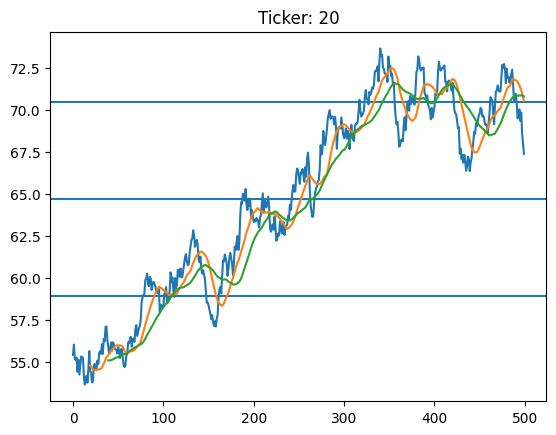

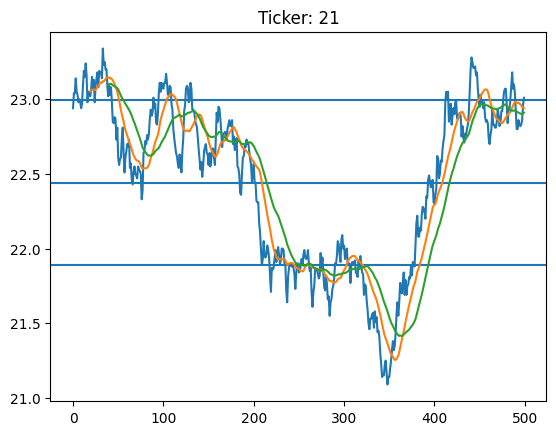

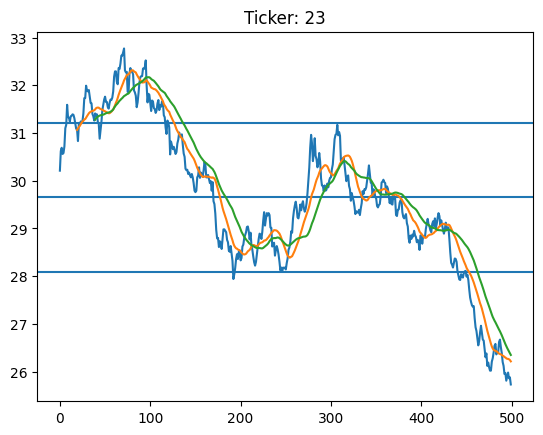

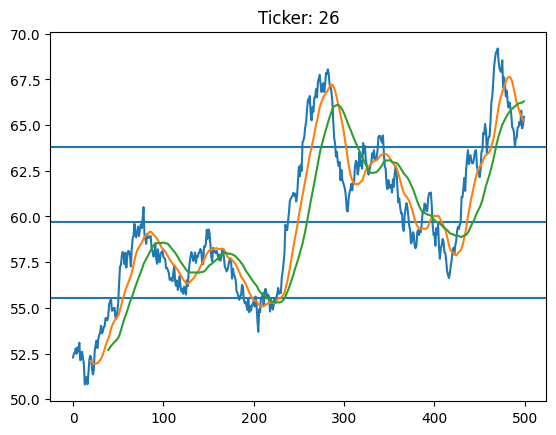

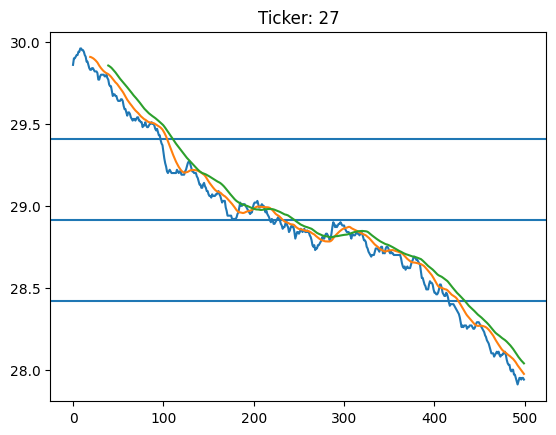

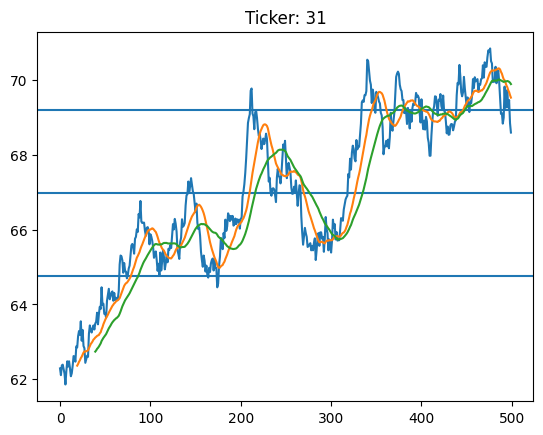

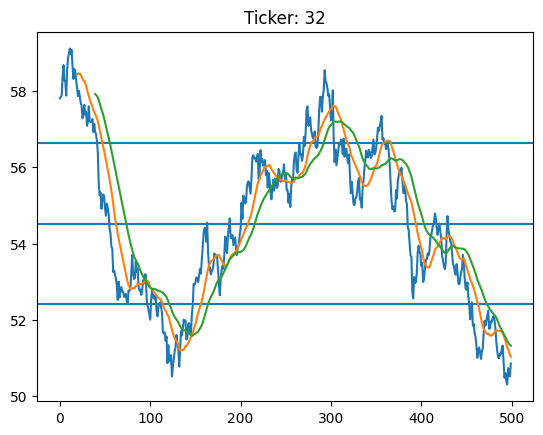

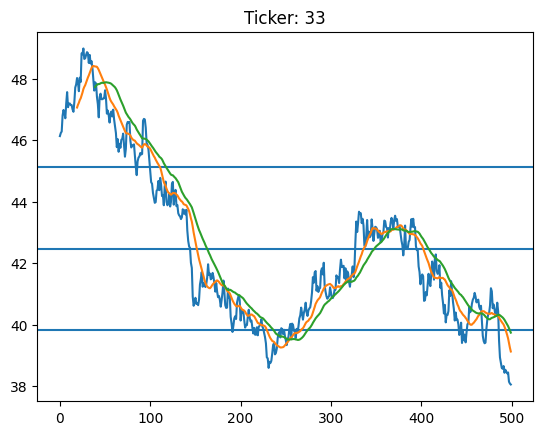

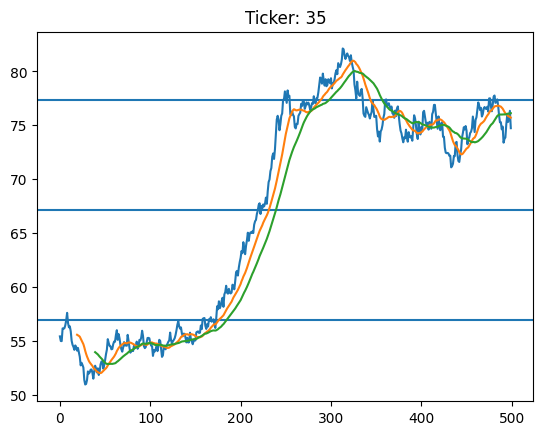

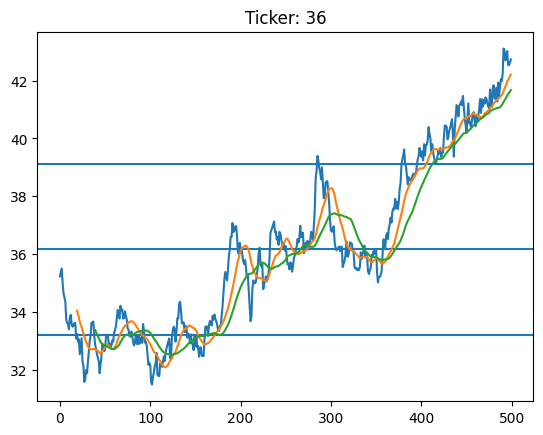

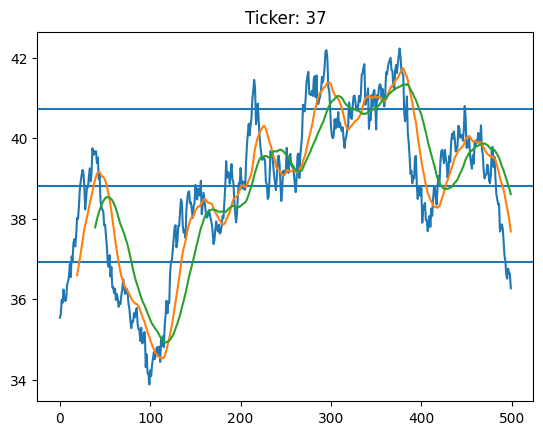

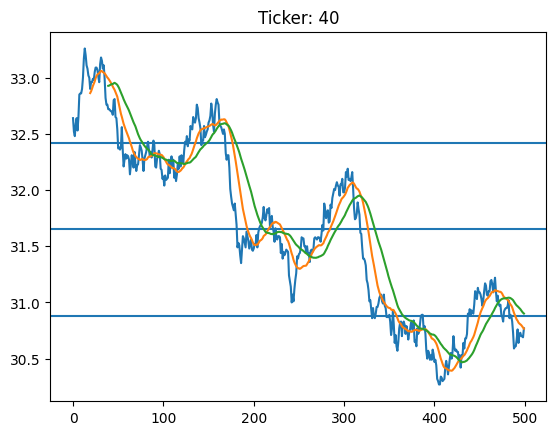

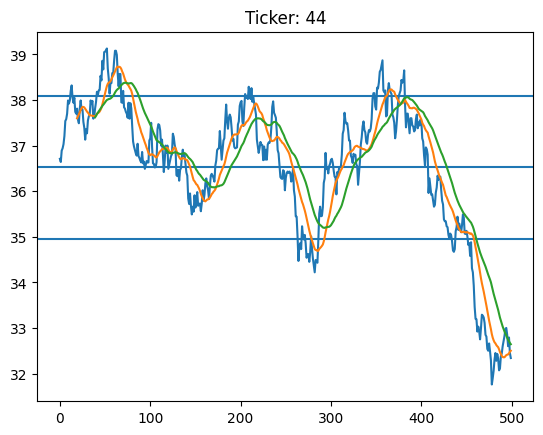

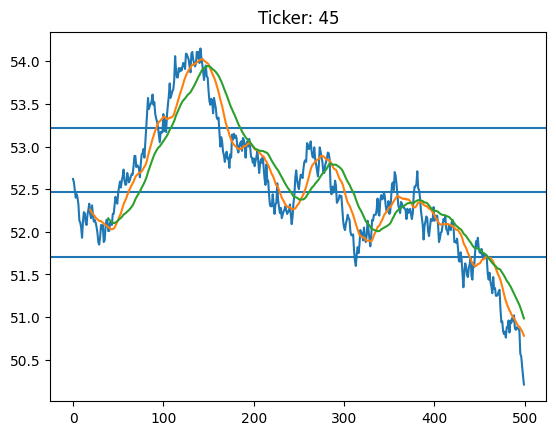

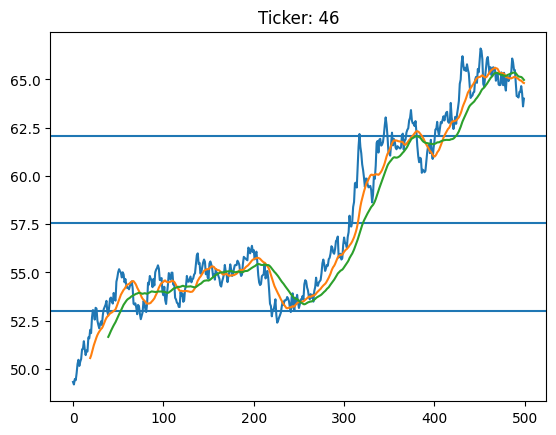

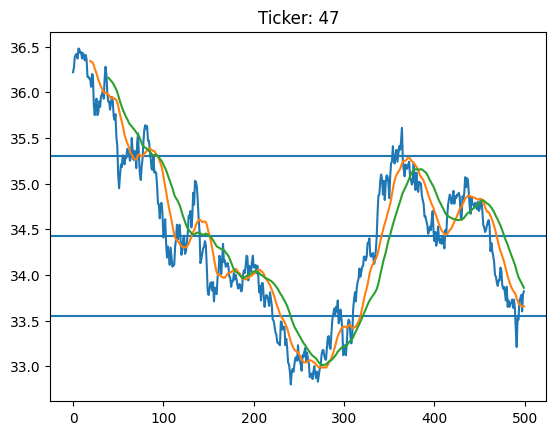

In [104]:
checkList = [0, 3, 4, 6, 9, 15, 16, 17, 18, 20, 21, 23, 26, 27, 31, 32, 33, 35, 36, 37, 40, 44, 45, 46, 47]
for item in checkList:
    plt.figure()
    plt.title("Ticker: " + str(item))
    plt.plot(df[item])
    plt.axhline(df[item].mean() + df[item].std())
    plt.axhline(df[item].mean())
    plt.axhline(df[item].mean() - df[item].std())

    plt.plot(df[item].rolling(20).mean())
    plt.plot(df[item].rolling(40).mean())

In [62]:
trainPicked = {}
for item in checkList:
    trainPicked[item] = df[item][:300]
trainData = pd.DataFrame(trainPicked)

In [63]:
trainData.describe()

,0,3,4,6,9,15,16,17,18,20,...,32,33,35,36,37,40,44,45,46,47
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,14.219600,49.440167,55.385400,18.336933,48.497733,24.521433,35.458133,45.181933,14.208400,60.921567,...,54.766100,43.124900,61.293633,34.399333,38.140767,32.140033,36.930733,52.876067,54.144200,34.396500
std,0.725858,1.242522,1.431875,0.263492,1.665523,1.164158,0.400190,0.545529,0.243091,4.276803,...,2.170496,3.047646,9.096819,1.815288,1.932570,0.525310,1.049923,0.586352,1.400684,1.033553
min,12.630000,47.350000,51.660000,17.870000,45.260000,22.290000,34.680000,43.970000,13.810000,53.640000,...,50.510000,38.590000,50.970000,31.490000,33.880000,31.000000,34.220000,51.850000,49.200000,32.800000
25%,13.580000,48.107500,54.547500,18.090000,47.157500,23.542500,35.127500,44.870000,14.000000,57.130000,...,52.937500,40.397500,54.597500,32.970000,36.557500,31.627500,36.372500,52.407500,53.387500,33.615000
50%,14.375000,49.775000,55.865000,18.360000,48.440000,24.605000,35.470000,45.265000,14.190000,60.660000,...,54.910000,41.785000,56.265000,33.735000,38.420000,32.210000,36.950000,52.820000,54.400000,34.160000
75%,14.802500,50.582500,56.472500,18.510000,49.662500,25.552500,35.862500,45.542500,14.400000,64.050000,...,56.382500,45.987500,67.630000,35.935000,39.382500,32.540000,37.705000,53.172500,55.025000,35.262500
max,15.560000,51.010000,57.910000,18.980000,52.660000,26.630000,36.240000,46.130000,14.750000,70.010000,...,59.120000,48.980000,79.790000,39.390000,42.190000,33.260000,39.130000,54.150000,56.860000,36.480000


In [113]:
# Get the arima model for each of them
# check autocorr
models = {}
orders = {}

for item in checkList:
    model = pm.auto_arima(
        df[item], 
        start_p=0, start_q=0, max_p=15, max_q=15, seasonal=False
    )

    models[item] = (model)

    print(f'eval model {item}, order {model.order}')
    orders[item] = model.order
    

eval model 0, order (0, 1, 0)
eval model 3, order (0, 1, 0)
eval model 4, order (7, 2, 1)
eval model 6, order (1, 1, 1)
eval model 9, order (0, 1, 1)
eval model 15, order (0, 1, 0)
eval model 16, order (1, 1, 0)
eval model 17, order (0, 1, 0)
eval model 18, order (0, 1, 0)
eval model 20, order (0, 1, 0)
eval model 21, order (0, 1, 0)
eval model 23, order (1, 1, 0)
eval model 26, order (0, 1, 0)
eval model 27, order (1, 1, 0)
eval model 31, order (0, 1, 0)
eval model 32, order (0, 1, 0)
eval model 33, order (0, 1, 0)
eval model 35, order (1, 1, 1)
eval model 36, order (0, 1, 0)
eval model 37, order (0, 1, 0)
eval model 40, order (0, 1, 0)
eval model 44, order (0, 1, 0)
eval model 45, order (0, 1, 0)
eval model 46, order (1, 1, 2)
eval model 47, order (0, 1, 0)


In [114]:
orders

{0: (0, 1, 0),
 3: (0, 1, 0),
 4: (7, 2, 1),
 6: (1, 1, 1),
 9: (0, 1, 1),
 15: (0, 1, 0),
 16: (1, 1, 0),
 17: (0, 1, 0),
 18: (0, 1, 0),
 20: (0, 1, 0),
 21: (0, 1, 0),
 23: (1, 1, 0),
 26: (0, 1, 0),
 27: (1, 1, 0),
 31: (0, 1, 0),
 32: (0, 1, 0),
 33: (0, 1, 0),
 35: (1, 1, 1),
 36: (0, 1, 0),
 37: (0, 1, 0),
 40: (0, 1, 0),
 44: (0, 1, 0),
 45: (0, 1, 0),
 46: (1, 1, 2),
 47: (0, 1, 0)}

In [65]:
testDict = {}
for item in checkList:
    testDict[item] = df[item][300:]
testData = pd.DataFrame(testDict)

In [97]:
def testError(testData, ticker, model):
    errors = []
    testSet = np.array(testData[ticker])
    for i in range(50, len(testSet)):
        start = i - 50
        estimate = model.apply(testSet[start:start + 50]).forecast(1)[0]
        actual = testSet[start + 50]
        error = actual - estimate
        errors.append(error)
    print(pd.Series(errors).describe())
    plt.figure()
    plt.title("Error of " + str(ticker))
    plt.plot(errors)

In [90]:
def testPriceChange(testData, ticker):
    testSet = np.array(testData[ticker])
    priceChanges = []
    for i in range(1, len(testSet)):
        priceChanges.append(testSet[i] - testSet[i-1])
    print(pd.Series(priceChanges).describe())
    plt.figure()
    plt.title("Price change of " + str(ticker))
    plt.plot(priceChanges)

<Axes: >

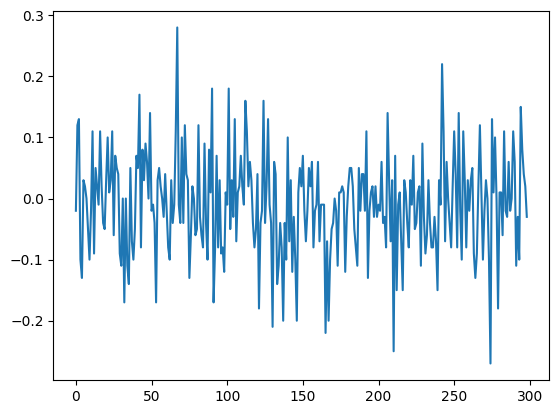

In [101]:
sns.lineplot(np.array(trainData[3])[1:] - np.array(trainData[3])[:-1])

In [125]:
ticker = 46
model = sm.tsa.arima.ARIMA(endog=trainData[ticker], order=orders[ticker])
res = model.fit()
print(res.summary())
res.save(f"../arima_model/model{ticker}.pickle")

                               SARIMAX Results                                
Dep. Variable:                     46   No. Observations:                  300
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -106.854
Date:                Wed, 26 Jun 2024   AIC                            221.707
Time:                        00:01:46   BIC                            236.509
Sample:                             0   HQIC                           227.631
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5685      0.385      1.476      0.140      -0.187       1.324
ma.L1         -0.5532      0.390     -1.419      0.156      -1.317       0.211
ma.L2         -0.0902      0.066     -1.366      0.1

count    150.000000
mean       0.020988
std        0.412321
min       -1.228501
25%       -0.218206
50%       -0.011149
75%        0.325134
max        0.981510
dtype: float64
count    199.000000
mean       0.036131
std        0.444573
min       -1.280000
25%       -0.285000
50%        0.030000
75%        0.355000
max        1.170000
dtype: float64


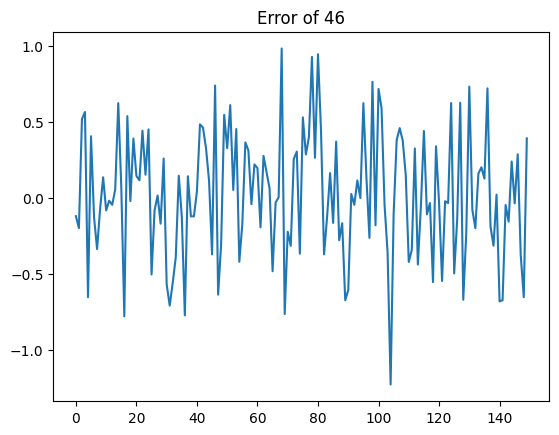

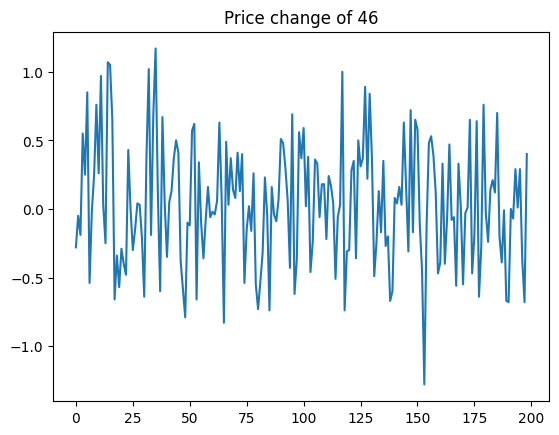

In [126]:
testError(testData, ticker, res)
testPriceChange(testData, ticker)

In [120]:
# Check if stationary
# Non-stationary
def test_stationary(series):
    print("Results of Dickey-Fuller Test:")
    dftest = stattools.adfuller(series, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

    print("Results of KPSS Test:")
    kpsstest = stattools.kpss(series, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

test_stationary(df[9])

Results of Dickey-Fuller Test:
Test Statistic                  -0.700945
p-value                          0.846504
#Lags Used                       3.000000
Number of Observations Used    496.000000
Critical Value (1%)             -3.443603
Critical Value (5%)             -2.867385
Critical Value (10%)            -2.569883
dtype: float64
Results of KPSS Test:
Test Statistic            2.116127
p-value                   0.010000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_8100\2431127549.py:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = stattools.kpss(series, regression="c", nlags="auto")


In [109]:
result = []
for item in checkList:
    series = df[item]
    dftest = stattools.adfuller(series, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )


    kpsstest = stattools.kpss(series, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    
    if (dfoutput["p-value"] < 0.1 or kpss_output["p-value"] > 0.1):
        result.append((item, dfoutput["p-value"], kpss_output["p-value"]))

C:\Users\DELL\AppData\Local\Temp\ipykernel_8100\1467511319.py:16: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = stattools.kpss(series, regression="c", nlags="auto")
C:\Users\DELL\AppData\Local\Temp\ipykernel_8100\1467511319.py:16: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = stattools.kpss(series, regression="c", nlags="auto")
C:\Users\DELL\AppData\Local\Temp\ipykernel_8100\1467511319.py:16: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = stattools.kpss(series, regression="c", nlags="auto")
C:\Users\DELL\AppData\Local\Temp\ipykernel_8100\1467511319.py:16: InterpolationWarning: The test statis

In [110]:
result

[(6, 0.08429036432772113, 0.01)]